<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Scikit_image_cropping_and_subtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit Example of image cropping & subtraction

---
We used sobel's filter for the coin images. Here we will use another algorithm for edge detection and eliminate background noises. ref. 1. https://scikit-image.org/docs/stable/user_guide/tutorial_segmentation.html 2. https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/


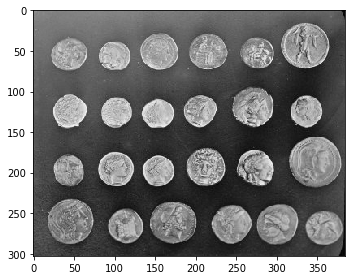

In [ ]:
from skimage import data, io, filters
#coin image
coins = data.coins()
io.imshow(coins)

In [ ]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

# Edge Detection - Sobel's filter



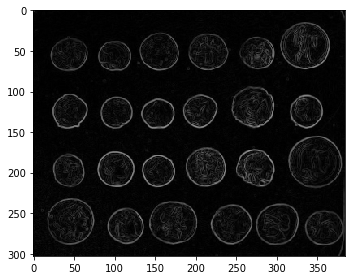

In [ ]:
# Sobel's filter
edges = filters.sobel(coins)
io.imshow(edges)
io.show()

In [ ]:
edges

array([[0.22261811, 0.22580966, 0.04256528, ..., 0.01675295, 0.00765711,
        0.0202113 ],
       [0.22752914, 0.17208326, 0.04307036, ..., 0.03683979, 0.00765711,
        0.01180548],
       [0.10007686, 0.06139791, 0.02499519, ..., 0.084638  , 0.00490196,
        0.02018751],
       ...,
       [0.01386484, 0.03114192, 0.02949335, ..., 0.01669548, 0.00588235,
        0.00876889],
       [0.02752092, 0.04030354, 0.0335059 , ..., 0.00571662, 0.00980392,
        0.00438445],
       [0.02941176, 0.05787636, 0.0417099 , ..., 0.00490196, 0.00876889,
        0.00554594]])

# Image Cropping

---

Compare the first and last coin

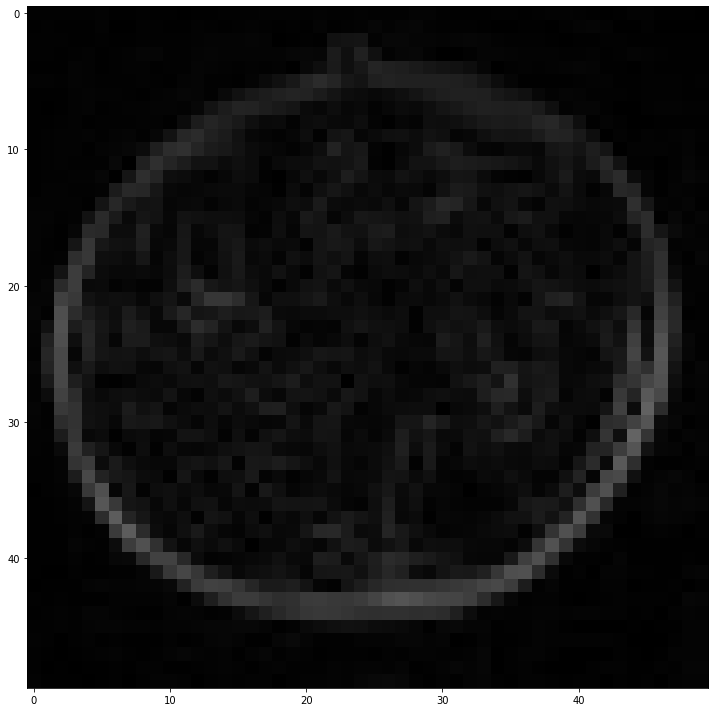

In [ ]:
# the coin on the upper left-hand corner
import matplotlib.pyplot as plt
first_coin=edges[30:80, 20:70]
plt.figure(figsize=(10, 10))
io.imshow(first_coin)
io.show()

In [ ]:
coins.shape

(303, 384)

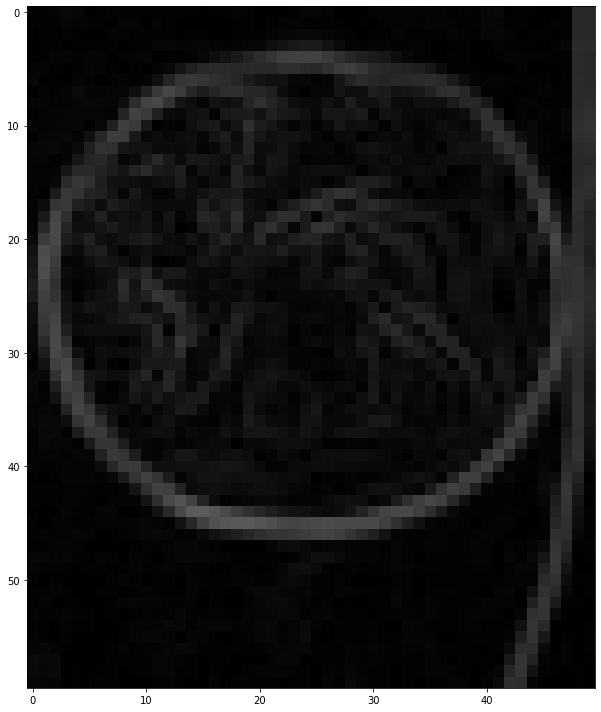

In [ ]:
# the coin on the lower right-hand corner
last_coin=edges[243:393, 334:384]
plt.figure(figsize=(10, 10))
io.imshow(last_coin)
io.show()

# Image Substraction

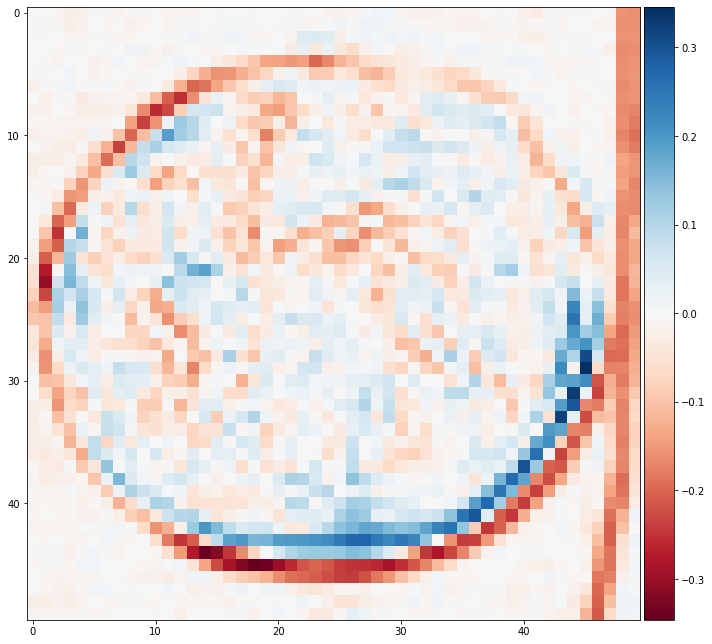

In [ ]:
# prepare a new image
# this all zeros in gray image will show all black since the values are zeros
import numpy as np
diff_image=np.zeros_like(first_coin)
nr=len(first_coin.mean(axis=1))
nc=len(first_coin.mean(axis=0))
# since the gray scale has been standardized in [0, 1], 0 - black; 1 - white
for i in range(0, nr):
    for j in range(0, nc):
        diff_image[i][j]=first_coin[i][j] - last_coin[i][j]
plt.figure(figsize=(10, 10))
io.imshow(diff_image)
io.show()

In [ ]:
diff_image

array([[ 0.00217438, -0.00266422, -0.00721979, ..., -0.00413026,
        -0.15405083, -0.15747168],
       [-0.00308548, -0.00390131, -0.00527957, ..., -0.0070569 ,
        -0.15770173, -0.15794686],
       [ 0.00322725, -0.00399954, -0.00061779, ..., -0.0016266 ,
        -0.15578395, -0.15610988],
       ...,
       [-0.00243643, -0.00895033, -0.01532337, ..., -0.13722396,
         0.01051711,  0.00363719],
       [-0.02115896, -0.0233575 , -0.0137562 , ..., -0.10520143,
         0.01549251,  0.0114052 ],
       [-0.01060311, -0.00791025, -0.00837403, ..., -0.06515192,
         0.01192133,  0.00968324]])

# Your Turn: 1. How do you take the advange of the postive and negative numbers in the pixels for decision making? 2. Crop the original image of the two coins and operate the subtraction operation. Do you obtain the same result?